In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('house_rental_data.csv')
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [3]:
# Step 1: Handle missing values (if any)
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Step 2: Remove irrelevant columns
df = df.drop('Unnamed: 0',axis = 1)

# Step 3: Remove duplicates (if any)
df = df.drop_duplicates()

# Step 4: Normalize the data
scaler = MinMaxScaler()
X = scaler.fit_transform(df[['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom']])


Missing Values:
 Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64


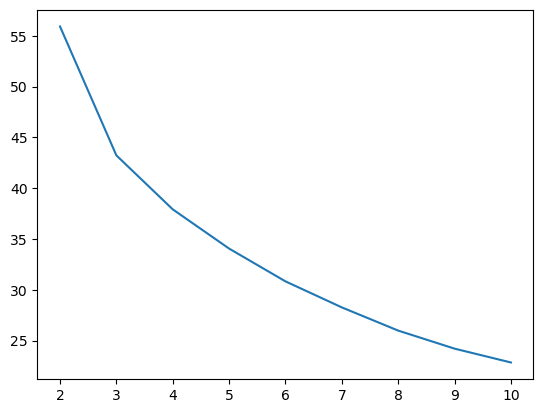

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


wcss = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(X)
    wcss.append([k, kmean.inertia_])
    
df_ec = pd.DataFrame(wcss)
plt.plot(df_ec[0], df_ec[1])
plt.show()


In [5]:
from sklearn.cluster import KMeans

# Define the optimal value of k based on the elbow method or any other criterion
k = 3

# Perform clustering with the chosen k value
kmeans = KMeans(n_clusters=k)
cluster_labels = kmeans.fit_predict(X)

# Add the cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Print the updated DataFrame with cluster assignments
print("Updated DataFrame with Cluster Assignments:\n", df.head())


Updated DataFrame with Cluster Assignments:
        Sqft  Floor  TotalFloor  Bedroom  Living.Room  Bathroom  Price  Cluster
0  1177.698      2           7        2            2         2  62000        1
1  2134.800      5           7        4            2         2  78000        1
2  1138.560      5           7        2            2         1  58000        2
3  1458.780      2           7        3            2         2  45000        1
4   967.776     11          14        3            2         2  45000        0
